In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [15]:
y0 = [0.0, 0.0, 149.6, 0.0, 1.49984,0.0, 0.0, 0.0, 0.0, 300.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0]
#y = [a0i, a1i, b0i,     b1i, c0i,       c1i, a0j, a1j, b0j, b1j,     c0j, c1j, a0k, a1k, b0k, b1k, c0k, c1k]
masses = [100,100,100]
G = 6.674e-11
t = np.linspace(0.0,25.0,100)
ts = (0,25)

In [16]:
def func(t,y):
    system = np.zeros_like(y)
    return ThreeBP(system,y,masses)

In [17]:
def magnitude3(Rx,Ry):
    mag = 0
    for i in range(0,len(Rx)):
        mag += np.power(Rx[i]-Ry[i],2)
        
    return np.power(mag,3/2)

In [18]:
#assemble Three Body System of Equations
def ThreeBP(system,y,masses):
    R1 = [y[0],y[6],y[12]] #x1,y1,z1
    R2 = [y[2],y[8],y[14]] #x2,y2,z2
    R3 = [y[4],y[10],y[16]] #x3,y3,z3 
    R = [R1,R2,R3]
    
    #generate i,j,k for mass 1
    for i in [0,6,12]:
        system[i] = y[i+1] 
        system[i+1] = -G*(masses[1]*(y[i+2]-y[i])/magnitude3(R[1],R[0])+masses[2]*(y[i+4]-y[i])/magnitude3(R[2],R[0])) 

    #generate i,j,k for mass 2
    for i in [2,8,14]:
        system[i] = y[i+1] 
        system[i+1] = -G*(masses[2]*(y[i+2]-y[i])/magnitude3(R[2],R[1])+masses[0]*(y[i-2]-y[i])/magnitude3(R[0],R[1]))
        
    #generate i,j,k for mass 3
    for i in [4,10,16]:
        system[i] = y[i+1] 
        system[i+1] = -G*(masses[0]*(y[i-4]-y[i])/magnitude3(R[0],R[2])+masses[1]*(y[i-2]-y[i])/magnitude3(R[1],R[2]))
    
    return system

In [19]:
sol = solve_ivp(func, ts, y0, t_eval=t, method='RK45')
sol.y

array([[ 0.00000000e+00, -1.22195455e-12, -2.46418645e-12, ...,
        -1.21966001e-10, -1.23224228e-10, -1.24482455e-10],
       [ 0.00000000e+00, -4.89886919e-12, -4.93914719e-12, ...,
        -4.98257701e-12, -4.98257764e-12, -4.98257824e-12],
       [ 1.49600000e+02,  1.49600000e+02,  1.49600000e+02, ...,
         1.49600000e+02,  1.49600000e+02,  1.49600000e+02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

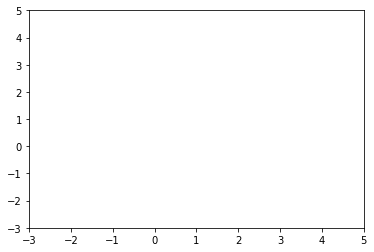

In [20]:
plt.plot(sol.y[2],sol.y[4])
plt.xlim(-3,5)
plt.ylim(-3,5)
plt.show()